Cohen's d: 1.130
Required sample size per group for 80% power: 14.0


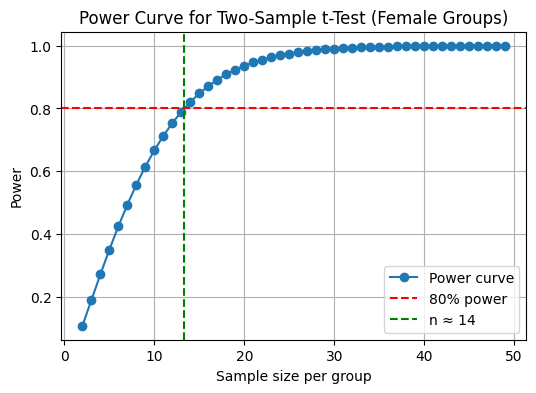

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower

# Female group data
group1 = np.array([0.9849281, 1.156565, 0.9199207, 1.39342, 1.162489, 1.136333, 
                   1.033737, 1.142152, 1.236697, 0.8859742, 1.3995])
group2 = np.array([0.9762474, 0.915548, 0.9568959, 1.05915, 0.9271551, 0.8888745, 
                   1.098047, 1.006554, 1.160184, 0.8123732, 0.9138225])

# Compute means and pooled standard deviation
mean1 = np.mean(group1)
mean2 = np.mean(group2)
sd1 = np.std(group1, ddof=1)
sd2 = np.std(group2, ddof=1)
pooled_sd = np.sqrt(((len(group1)-1)*sd1**2 + (len(group2)-1)*sd2**2) / (len(group1)+len(group2)-2))

# Cohen's d
effect_size = abs(mean1 - mean2) / pooled_sd
print(f"Cohen's d: {effect_size:.3f}")

# Power analysis object
analysis = TTestIndPower()

# Target power
target_power = 0.8
alpha = 0.05

# Solve for sample size per group for 80% power
required_n = analysis.solve_power(effect_size=effect_size, power=target_power, alpha=alpha, alternative='two-sided')
print(f"Required sample size per group for 80% power: {np.ceil(required_n)}")

# Power curve for a range of sample sizes
sample_sizes = np.arange(2, 50)
powers = [analysis.solve_power(effect_size=effect_size, nobs1=n, alpha=alpha, alternative='two-sided') for n in sample_sizes]

plt.figure(figsize=(6,4))
plt.plot(sample_sizes, powers, marker='o', label='Power curve')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% power')
plt.axvline(x=required_n, color='g', linestyle='--', label=f'n ≈ {int(np.ceil(required_n))}')
plt.xlabel('Sample size per group')
plt.ylabel('Power')
plt.title('Power Curve for Two-Sample t-Test (Female Groups)')
plt.legend()
plt.grid(True)
plt.show()
